Coordinate descent is optimal for the lasso problem. Here we will compare the convergence rate of Gradient Descent vs Coordinate Descent.

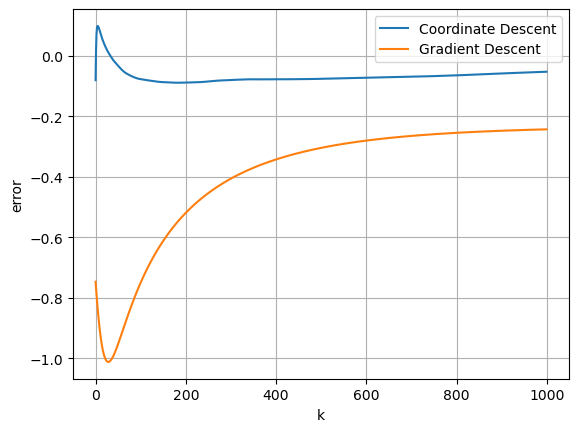

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

np.random.seed(42)
n, p = 100, 200
X = np.random.randn(n, p)
y = np.random.randn(n)

true_theta = np.zeros(p)
true_theta[::10] = np.random.randn(p//10)
l = 0.1
niter=1000
lasso = Lasso(alpha=l)
lasso.fit(X, y)
theta_hat = lasso.coef_

cd_theta = np.zeros(p)
cd_errors = []

for k in range(niter):
    for j in range(p):
        rho = X[:, j].T @ (y-X@cd_theta+X[:,j]*cd_theta[j])
        if rho<-l:
            cd_theta[j]=(rho+l)/(X[:,j].T@X[:,j])
        elif rho>l:
            cd_theta[j]=(rho-l)/(X[:,j].T@X[:,j])
        else:
            cd_theta[j]=0
    error = np.linalg.norm(cd_theta-theta_hat)
    cd_errors.append(np.log(error))

gd_theta = np.zeros(p)
gd_errors = []
for k in range(niter):
    gradient = -X.T @ (y - X @ gd_theta)+l*np.sign(gd_theta)
    gd_theta -= 0.0001 * gradient
    error = np.linalg.norm(gd_theta - theta_hat)
    gd_errors.append(np.log(error))
plt.plot(np.arange(niter), cd_errors, label='Coordinate Descent')
plt.plot(np.arange(niter), gd_errors, label='Gradient Descent')
plt.xlabel('k')
plt.ylabel('error')
plt.legend()
plt.grid(True)
plt.show()

Why is coordinate descent better for the lasso problem than gradient descent? .... More Typing .... 

Now we look at GD vs CD for multiple values of Lambda. why? Sparsity... Type more here...

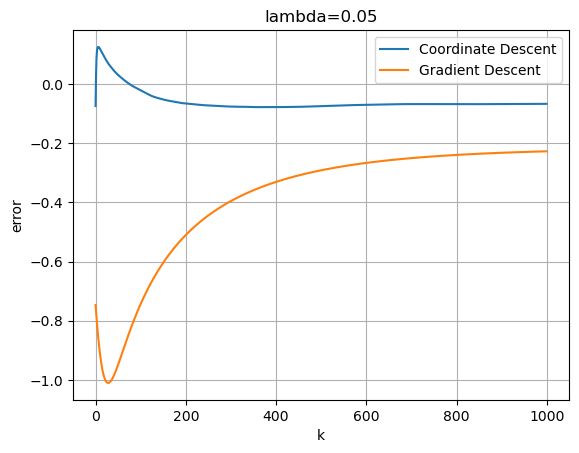

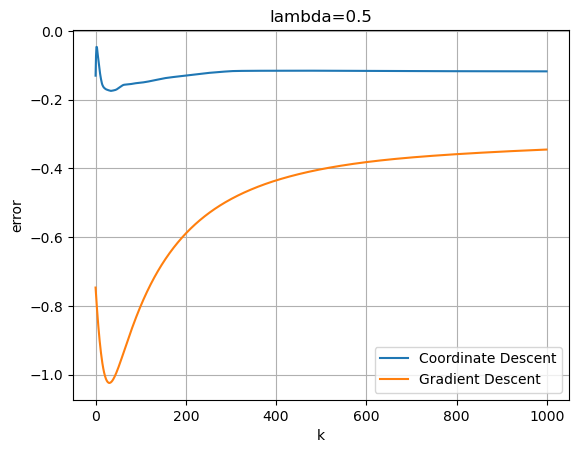

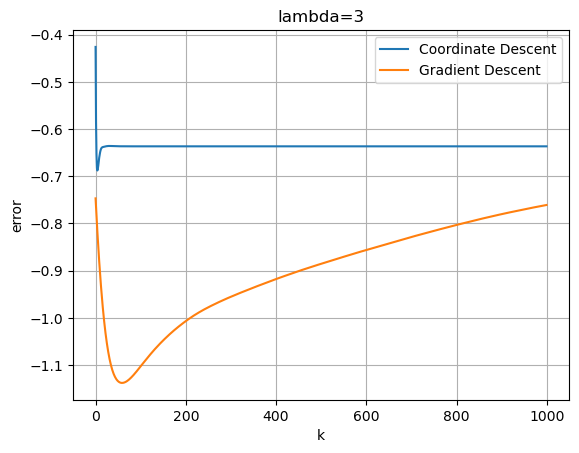

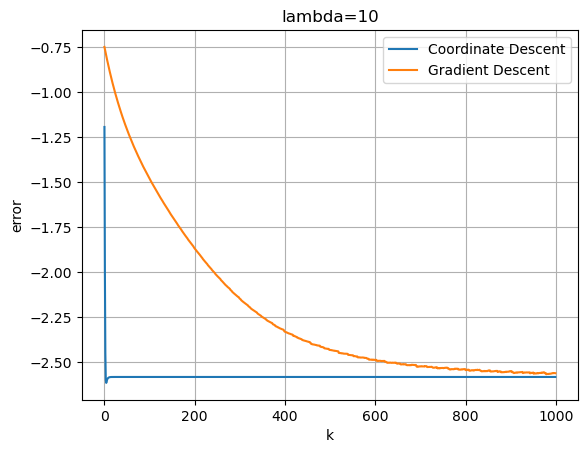

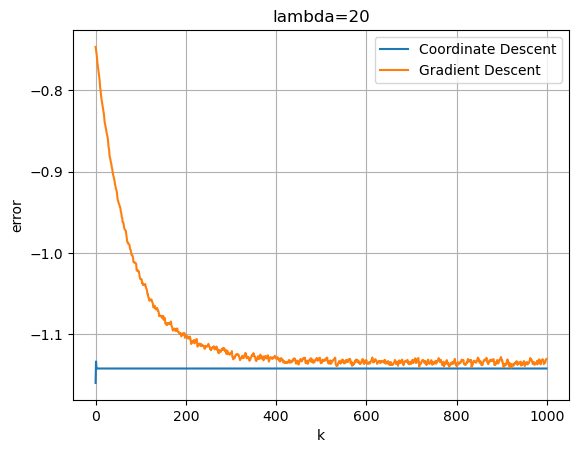

In [20]:
lambdas = [0.05, 0.5, 3, 10, 20]
lasso = Lasso(alpha=l)
lasso.fit(X, y)
theta_hat = lasso.coef_



for l in lambdas:
    cd_theta = np.zeros(p)
    cd_errors = []
    for k in range(niter):
        for j in range(p):
            rho = X[:, j].T @ (y-X@cd_theta+X[:,j]*cd_theta[j])
            if rho<-l:
                cd_theta[j]=(rho+l)/(X[:,j].T@X[:,j])
            elif rho>l:
                cd_theta[j]=(rho-l)/(X[:,j].T@X[:,j])
            else:
                cd_theta[j]=0
        error = np.linalg.norm(cd_theta-theta_hat)
        cd_errors.append(np.log(error))

    gd_theta = np.zeros(p)
    gd_errors = []
    for k in range(niter):
        gradient = -X.T @ (y - X @ gd_theta)+l*np.sign(gd_theta)
        gd_theta -= 0.0001 * gradient
        error = np.linalg.norm(gd_theta - theta_hat)
        gd_errors.append(np.log(error))
    plt.title(f"lambda={l}")
    plt.plot(np.arange(niter), cd_errors, label='Coordinate Descent')
    plt.plot(np.arange(niter), gd_errors, label='Gradient Descent')
    plt.xlabel('k')
    plt.ylabel('error')
    plt.legend()
    plt.grid(True)
    plt.show()